<a href="https://colab.research.google.com/github/PaoloBarba/ADM_HW2-Group18/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algorithmic Methods of Data Mining**

#Academic year 2022–2023

# Homework 2 - Instagram Profiles & Posts

Authors: Barba Paolo, Bellaroba Albachiara, Soukaina Alaoui, Gasbarri Francesca.

#Import the packages and upload datasets


In [1]:
import pandas as pd
import random
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm     
from datetime import datetime
from time import strptime



In [2]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
locations =pd.read_csv('/content/drive/MyDrive/ADM_HW2/instagram_locations.csv',sep='\t')
profiles =pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_profiles.csv",sep='\t')
posts =pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv",sep='\t',nrows=100000)

# RQ1 
## Exploratory Data Analysis

To perform an explanatory data analysis, we will go through three different steps: data explorations, data manipulations, and data summary.
First, we will show the first few rows of the datasets we are analyzing.

In [ ]:
locations.head()

In [ ]:
profiles.head()

In [ ]:
posts.head()

We can now look at the columns of our datasets to understand which variables we are analyzing.
First of all, we will do info method into the dataset to quickly understand the variables we are working with, get the number of rows and
columns we have for each dataset.

In [7]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sid                     1022658 non-null  int64  
 1   id                      1022658 non-null  int64  
 2   name                    1022658 non-null  object 
 3   street                  715704 non-null   object 
 4   zip                     715579 non-null   object 
 5   city                    937166 non-null   object 
 6   region                  1760 non-null     object 
 7   cd                      939010 non-null   object 
 8   phone                   601688 non-null   object 
 9   aj_exact_city_match     1000510 non-null  object 
 10  aj_exact_country_match  1000510 non-null  object 
 11  blurb                   406705 non-null   object 
 12  dir_city_id             495698 non-null   object 
 13  dir_city_name           495698 non-null   object 
 14  di

In [6]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509586 entries, 0 to 4509585
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   sid                  int64  
 1   profile_id           float64
 2   profile_name         object 
 3   firstname_lastname   object 
 4   description          object 
 5   following            float64
 6   followers            float64
 7   n_posts              float64
 8   url                  object 
 9   cts                  object 
 10  is_business_account  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 378.5+ MB


In [5]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   sid              100000 non-null  int64 
 1   sid_profile      100000 non-null  int64 
 2   post_id          100000 non-null  object
 3   profile_id       100000 non-null  int64 
 4   location_id      100000 non-null  int64 
 5   cts              100000 non-null  object
 6   post_type        100000 non-null  int64 
 7   description      91905 non-null   object
 8   numbr_likes      100000 non-null  int64 
 9   number_comments  100000 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 7.6+ MB


In [ ]:
print("Locations dataframe has " + str(locations.shape[0]) + " observations and "  + str(locations.shape[1]) + " variables")
print("Profiles dataframe has " + str(profiles.shape[0]) + " observations and "  + str(profiles.shape[1]) + " variables")
print("Posts dataframe has " + str(posts.shape[0]) + " observations and "  + str(posts.shape[1]) + " variables")

We are going one step further, having a better understanding of the statistical properties of these data frames by using a described method that gives us basic statistics of all the numerical columns we have. We are doing a statistical summarization at all the numeric variables that have the sense to summarize.

In [ ]:
profiles[["following" , "followers" , "n_posts" ]].describe()

In [ ]:
posts[["numbr_likes","number_comments"]].describe()

To do a better analysis, we clean up our datasets as much as possible by following the steps described below.


1.   **Dealing with duplicates rows**:
      we drop every duplicates rows because contains useless informations 
2.    **Dealing with missing values**:
      we check the percentage of missing values in each column, we drop a column that contains missing values over a set threshold. After we select some columns of interest and drop the NA
3. **Dealing with outliers:** It is risky to include outliers in data-driven models. For some variables of interest, we have incorrect typing data or false profiles that influence the distribution so much, we want to detect them and decide whether to delete them or not.





In [ ]:
#Duplicates rows
profiles.drop_duplicates(inplace=True)
posts.drop_duplicates(inplace=True)
locations.drop_duplicates(inplace=True)

In [ ]:
#Dealing with missing values, columns that contains so much Na
#check for null values / % of null values we have
print('Null values percentage for locations dataset')
print(locations.isnull().sum()/locations.shape[0])
print('\n')
print('Null values percentage for profiles dataset')
print(profiles.isnull().sum()/profiles.shape[0])
print('\n')
print('Null values percentage for posts dataset')
print(posts.isnull().sum()/posts.shape[0])

Null values percentage for locations dataset
sid                       0.000000
id                        0.000000
name                      0.000000
street                    0.300153
zip                       0.300275
city                      0.083598
region                    0.998279
cd                        0.081795
phone                     0.411643
aj_exact_city_match       0.021657
aj_exact_country_match    0.021657
blurb                     0.602306
dir_city_id               0.515285
dir_city_name             0.515285
dir_city_slug             0.515751
dir_country_id            0.515353
dir_country_name          0.515285
lat                       0.006026
lng                       0.006026
primary_alias_on_fb       0.583897
slug                      0.079196
website                   0.390547
cts                       0.000000
dtype: float64


Null values percentage for profiles dataset
sid                    0.000000
profile_id             0.007195
profile_name           0.

In [ ]:
#remove null colums over the threshold
profiles.dropna(thresh = len(profiles)*.6, axis=1)
locations.dropna(thresh = len(locations)*.6, axis=1)

We have to manage Na and outliers values to do a better analysis.
For Na values, we have more than one option to do.

**Replace with the mean:** if there are a lot of missing values we are concentrating the distribution in the mean value and we lose information about the true shape of the distributions.

**Drop Na:** We are losing a relevant percentage of the information we have, however having a huge quantity of data, doesn't influence so much the distribution we are analyzing. So in this case we will go through this procedure .

In [ ]:
#We show only some example of variable we are cleaning
posts.dropna(subset=['numbr_likes', 'number_comments'])

The existence of misleading values has the potential to change the conclusion implied by the model. It is, therefore, important to detect and then decide whether to remove it or not from the dataset. Sometimes the data point may be extremely high or low but that does not mean it is an outlier that we want to get rid of. In the case of Instagram, for instance, a huge amount of followers' value is no sign of errors but can correspond to influencer accounts. On the opposite, an account with zero posts or zero followers usually corresponds to a fake or new account that we don't want to consider in our analysis (we will clean them up when we will analyze them in the next questions) .



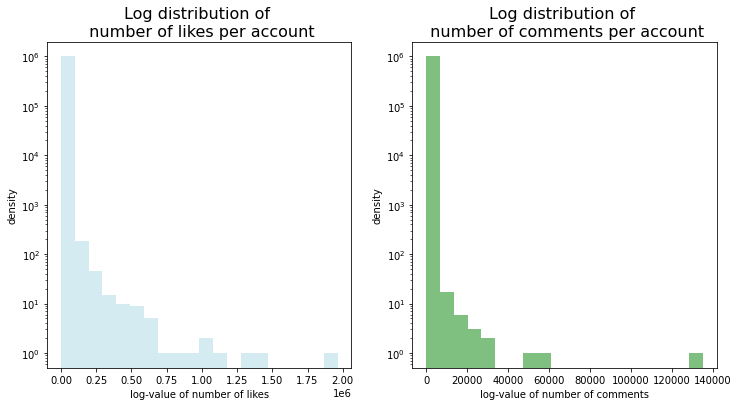

In [ ]:
num_bins = 20
plt.figure(figsize=(12,6))

# Logaritmic histogram of the data and box plot
plt.subplot(121)
plt.hist(posts['numbr_likes'] ,  num_bins, facecolor='lightblue', alpha=0.5,log=True)
plt.xlabel("log-value of number of likes")
plt.ylabel("density")
plt.title("Log distribution of \n number of likes per account", size = 16)

plt.subplot(122)
plt.hist(posts['number_comments'] ,  num_bins, facecolor='green', alpha=0.5,log=True)
plt.xlabel("log-value of number of comments")
plt.ylabel("density")
plt.title("Log distribution of \n number of comments per account", size = 16)

plt.show()

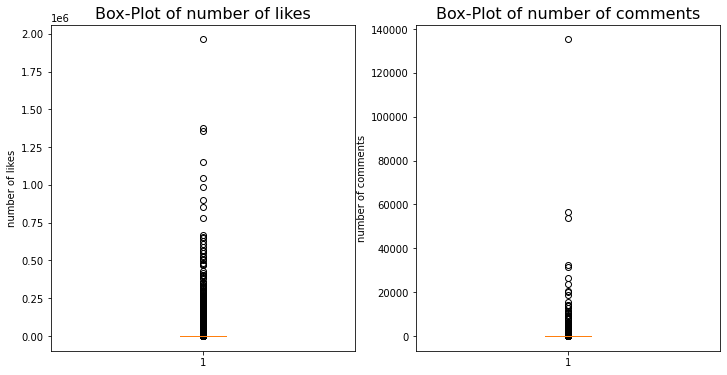

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(posts['numbr_likes'] )
plt.xlabel("")
plt.ylabel("number of likes")
plt.title("Box-Plot of number of likes", size = 16)

plt.subplot(122)
plt.boxplot(posts['number_comments'])
plt.xlabel("")
plt.ylabel("number of comments")
plt.title("Box-Plot of number of comments", size = 16)

plt.show()

We used a logarithmic scale because the data covers a wide range of values and there is an evident skewness toward small values.

Since most of the observations are concentrating to low value, we can show the actual distribution untill the 90% percentile.

In [ ]:
likes_outliers= posts.numbr_likes[posts.numbr_likes < posts.numbr_likes.quantile(.9)]
comments_outliers= posts.number_comments[posts.number_comments< posts.number_comments.quantile(.9)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of \n number of comments per post')]

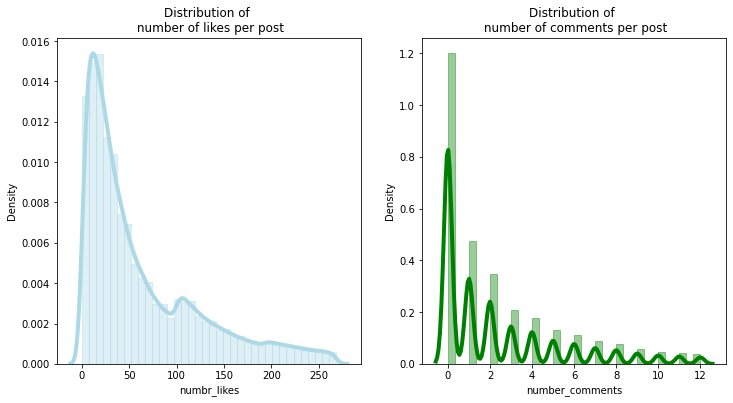

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(likes_outliers, hist=True, kde=True, 
             bins=int(180/5), color = 'lightblue', 
             hist_kws={'edgecolor':'lightblue'},
             kde_kws={'linewidth': 4}).set(title='Distribution of \n number of likes per post')
plt.subplot(122)
sns.distplot(comments_outliers, hist=True, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'green'},
             kde_kws={'linewidth': 4}).set(title='Distribution of \n number of comments per post')
plt.show()

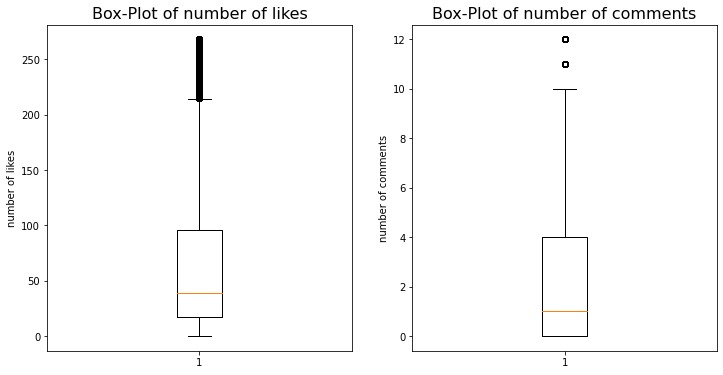

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(likes_outliers )
plt.xlabel("")
plt.ylabel("number of likes")
plt.title("Box-Plot of number of likes", size = 16)

plt.subplot(122)
plt.boxplot(comments_outliers)
plt.xlabel("")
plt.ylabel("number of comments")
plt.title("Box-Plot of number of comments", size = 16)

plt.show()

# RQ4

In [ ]:
filename="/content/drive/MyDrive/ADM_HW2/instagram_posts.csv"


def from_profile_to_post(profile):
  
  df1 = pd.DataFrame(columns= posts.columns)
  df = pd.read_csv(filename, sep='\t', chunksize=500000)

  
  for chunk in tqdm(df):
    df1 = pd.concat([ df1 , chunk[chunk ['sid_profile'] == profile ] ]) 

  return df1



In [ ]:
from_profile_to_post(199664772)

3it [00:10,  3.58s/it]


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments


In [ ]:
filename="/content/drive/MyDrive/ADM_HW2/instagram_posts.csv"
df1 = pd.DataFrame(columns= posts.columns)

df = pd.read_csv(filename, sep='\t', nrows=1000)
pd.concat([ df1 , df[df ['sid_profile'] == 3496776 ] ]) 




In [ ]:
def posts_top_n(n):
  n_prof = profiles.sort_values(by=['n_posts'], ascending=False).head(n)
  top_df =  pd.DataFrame(columns= posts.columns)
  for p in n_prof['profile_id']:
    top_df= pd.concat([top_df ,from_profile_to_post(int(p))])
  return top_df




In [ ]:
posts_top_n(2)

86it [05:39,  3.95s/it]
86it [05:33,  3.88s/it]


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments


In [ ]:
profiles.sort_values(by=['n_posts'], ascending=False).head(5)

# RQ7

In order to compute the probability, we use the frequentist approach, that is we divide the number of ways the event can occur by the total number of outcomes. The target event $\hat{p}$ is the case in which the number of likes of a post is greater than 20% of the number of followers of the account linked to that post:
\begin{equation}
\hat{p} = \frac{1}{n} ∑_{i = 1}^{lenpost} X_i 
\end{equation}
where
\begin{cases}
x_i = 1, n_{likes,i} > 0.2(n_{followers,i}) \\
x_i = 0, otherwise
\end{cases}
According to the media condizionata theorem, we can split the dataset in multiple chuncks and compute the $\hat{p}$ for every chunck. The total final probability will be equal to the mean of $\hat{p}_i$.

In [ ]:
filename="/content/drive/MyDrive/ADM_HW2/instagram_posts.csv"

df = pd.read_csv(filename, usecols= ['numbr_likes' , 'sid_profile'], sep='\t', iterator=True, chunksize=500000)
shape = 0
l=[]
for chunk in tqdm(df):
  m=pd.merge(chunk , profiles, left_on="sid_profile", right_on="sid").drop('sid', axis=1)
  l.append(sum(m.apply(lambda x :  (x.numbr_likes + 1) / (x.followers + 1), axis = 1 ) > .2))
  shape += m.shape[0]




86it [16:11, 11.30s/it]


In [ ]:
sum(l)/shape

0.15670264527000136

In the code, we add 1 to the formula, both in the nominator and denomitor, in order to manage the posts who belong to profiles with zero followers. [todo aggisutare la media ]


In [ ]:
filename="/content/drive/MyDrive/ADM_HW2/instagram_posts.csv"
df = pd.read_csv(filename, usecols= ['location_id' , 'sid_profile'], sep='\t', iterator=True, chunksize=2000000 )
loc=[]
shape= 0
for chunk in tqdm(df):
  m = pd.merge( chunk , profiles , left_on="sid_profile", right_on="sid").drop('sid', axis=1)
  loc.append(sum(m.groupby('sid_profile', group_keys=True).apply(lambda x:len(x.location_id) != len(set(x.location_id)) )))
  shape += m.shape[0]




In [18]:
np.sum(loc)/shape

0.043576335180082054

When computing this probability, we used the same approach as before. In this case, we want to explore the event that a given user visited any location more than once. In order to do that, we grouped the rows by profiles and for each one we return 'True' if the list of locations associated to that profile had duplicates.
In our opinion, this probability does not make much sense since a user could post a picture in the same location months after they visited that place, without actually go there. Moreover, a user could go to the same place but insert a different location_id, that is they could once use a more accurate location tag and another time a more vague one (e.g. Colosseum and Rome).

# R8

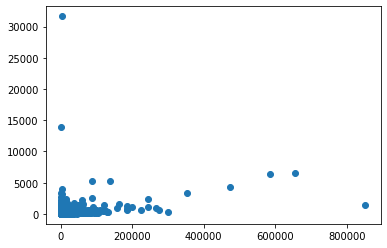

In [4]:
plt.scatter(posts.numbr_likes, posts.number_comments);
#disegnare la retta di regressione.

In [69]:
time_intervals = [('06:00:00', '10:59:59'),('11:00:00', '13:59:59'),('14:00:00', '16:59:59'),('17:00:00', '19:59:59'),('20:00:00', '23:59:59'),('00:00:00', '02:59:59'),('03:00:00', '05:59:59')]
posts["cts"]= pd.to_datetime(posts["cts"])	


posts.resample('H', on='cts').number_comments.sum()

 
   #tot = int(tot[0])
   #RES = pd.DataFrame({'time interval (start, end)' : [interval], 'total posts' : tot , 'number_comments' :   , 'number_likes': })
   #value_counts = value_counts.append(RES)




NameError: ignored

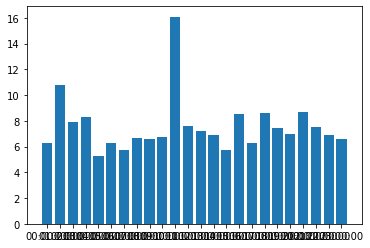

In [49]:
#pub_time = pd.to_datetime(posts.cts).dt.floor('Min').dt.time
#posts['cts'] = pd.to_datetime(posts.cts).dt.floor('H').dt.time
grouping = posts.groupby(posts.cts).apply( lambda x : np.mean(x.number_comments))
timing = grouping.index.to_list()
dic={}
for x, t in zip(grouping, timing):
  dic['{:02d}:{:02d}:{:02d}'.format(t.hour, t.minute, t.second)] = x
dic.keys()
data ={'cts' : dic.keys(), 'mean_number_comments': dic.values() }

df = pd.DataFrame(data)
plt.bar(df.cts , df.mean_number_comments);


In [51]:
grouping = posts.groupby(posts.cts).apply( lambda x : x.number_comments)
grouping

cts            
00:00:00  23       0
          40       5
          49       0
          58       1
          61       0
                  ..
23:00:00  99980    2
          99983    3
          99985    6
          99987    1
          99998    0
Name: number_comments, Length: 100000, dtype: int64